In [3]:
import torch
from torchvision import datasets, transforms
import torch.nn.functional as F

In [4]:
# Transform each image into tensor and normalized with mean and std
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
# Define the batch size used each time we go through the dataset
batch_size = 32

# Set the training loader
train_loader = torch.utils.data.DataLoader(datasets.MNIST('data', train=True, download=True, transform=transform), batch_size=batch_size, shuffle=True)
# Set the testing loader
test_loader = torch.utils.data.DataLoader(datasets.MNIST('data', train=False, download=True, transform=transform), batch_size=batch_size, shuffle=True)

In [5]:

## Init weights
# 784 because there is 784 pixels in each image
# 10 because there is 10 possible outputs : 0,1,2,3,4,5,6,7,8,9
# Each pixel is linked to 10 outputs where each link is a weight to optimize\
# <=> Each class is linked to 784 pixel where each link is a weight to optimize
weights = torch.randn(784, 10, requires_grad=True)

In [6]:
print(weights)

tensor([[-1.1957,  0.1059, -2.6005,  ..., -0.1492, -0.2478,  1.5750],
        [-0.6154,  0.9678,  1.2196,  ...,  0.2622,  0.5008,  1.2018],
        [ 0.0975,  2.5442,  1.7177,  ..., -0.5051, -0.2357,  0.9957],
        ...,
        [ 0.6430, -1.1711,  0.0845,  ..., -1.1723, -0.6465,  0.2327],
        [ 0.2031, -0.7183, -1.0854,  ..., -1.2435, -0.1675, -0.8184],
        [ 0.7743, -0.4214, -1.6019,  ..., -0.5324, -0.8781,  1.0453]],
       requires_grad=True)


In [8]:
def test(weights, test_loader):
    test_size = len(test_loader.dataset)
    correct = 0

    for batch_idx, (data, target) in enumerate(test_loader):
        #print(batch_idx, data.shape, target.shape)
        data = data.view((-1, 28*28))
        print(batch_idx, data.shape, target.shape)
        break
        
        outputs = torch.matmul(data, weights)
        softmax = F.softmax(outputs, dim=1)
        pred = softmax.argmax(dim=1, keepdim=True)
        n_correct = pred.eq(target.view_as(pred)).sum().item()
        correct += n_correct

    acc = correct / test_size
    print(" Accuracy on test set", acc)
    return

test(weights, test_loader)

0 torch.Size([32, 784]) torch.Size([32])
 Accuracy on test set 0.0


In [10]:
it = 0
for batch_idx, (data, targets) in enumerate(train_loader):
    # Be sure to start the loop with zeros grad
    if weights.grad is not None:
        weights.grad.zero_()
    
    data = data.view((-1, 28*28))
    #print("batch_idx: {}, data.shape: {}, target.shape: {}".format(batch_idx, data.shape, targets.shape))
    outputs = torch.matmul(data, weights)
    #print("outputs.shape: {}".format(outputs.shape))

    log_softmax = F.log_softmax(outputs, dim=1)
    #print("Log softmax: {}".format(log_softmax.shape))
    print(log_softmax)
    break
    #print((-log_softmax[0][targets[0]] + -log_softmax[1][targets[1]] )  / 2 )
    #print(-log_softmax[0][targets[0]], targets[0])
    
    loss = F.nll_loss(log_softmax, targets)
    print("\rLoss shape: {}".format(loss), end="")
    
    # Compute the gradients for each variables
    loss.backward()
    
    with torch.no_grad():
        weights -= 0.1*weights.grad
        
    it += 1
    if it % 100 == 0:
        test(weights, test_loader)
        
    if it > 5000:
        break

tensor([[-6.6375e+01, -4.5260e+01, -2.7913e+01, -8.5335e+00, -3.8389e+01,
         -3.3684e+01, -6.4412e+00, -1.7930e-03, -4.0020e+01, -4.4889e+01],
        [-6.5237e+01, -1.4378e+01, -6.9867e+01, -5.2577e+01, -2.8496e+01,
         -5.8315e+01, -1.8165e+01, -2.9329e+00, -5.7324e+01, -5.4713e-02],
        [-5.9689e+01, -6.5596e+01, -1.2930e-02, -4.5298e+01, -8.8599e+01,
         -9.3255e+01, -4.3547e+00, -1.4343e+01, -6.5479e+01, -2.6502e+01],
        [-7.1841e+01, -3.2556e+01, -3.9537e+01, -6.1211e+01, -1.1294e+00,
         -1.1261e+02, -3.9043e-01, -5.0897e+01, -2.9107e+01, -7.2305e+01],
        [-6.9943e+01, -2.8169e+01, -2.4630e+01, -5.4376e+01, -2.4221e+01,
         -7.4867e+01, -3.5545e-03, -5.6836e+01, -9.2504e+01, -5.6413e+00],
        [-3.7770e+01, -2.2411e+01, -5.0251e+01, -9.7454e+00, -2.5935e+01,
         -1.5516e-03, -2.9971e+01, -6.5077e+00, -2.7266e+01, -1.8542e+01],
        [-2.7608e+01, -2.7974e+01, -2.3263e+00, -5.7176e+01, -3.8812e-01,
         -4.3455e+01, -1.4983e+0

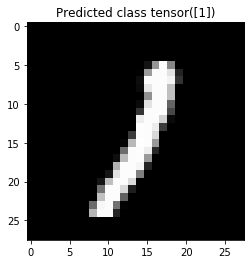

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

batch_idx, (data, target) = next(enumerate(test_loader))
data = data.view((-1, 28*28))

outputs = torch.matmul(data, weights)
softmax = F.softmax(outputs, dim=1)
pred = softmax.argmax(dim=1, keepdim=True)

plt.imshow(data[0].view(28, 28), cmap="gray")
plt.title("Predicted class {}".format(pred[0]))
plt.show()